# Illustration of the preprocessing steps

In [1]:
# Import packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from fuller.mrfRec import MrfRec
from fuller.generator import rotosymmetrize
from fuller.utils import saveHDF

from mpes import fprocessing as fp

import os

/mnt/pcshare/users/Laurenz/AreaB/fuller/.pyenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/pcshare/users/Laurenz/AreaB/fuller/.pyenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/pcshare/users/Laurenz/AreaB/fuller/.pyenv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/mnt/pcsha

In [2]:
data_path = '../' # Put in Path to a storage of at least 20 Gbyte free space.
if not os.path.exists(data_path + "/data.zip"):
    os.system(f"curl -L --output {data_path}/data.zip https://zenodo.org/records/7314278/files/data.zip")
if not os.path.isdir(data_path + "/data"):
    os.system(f"unzip -d {data_path} -o {data_path}/data")

In [13]:
# Load data
data = fp.readBinnedhdf5('../data/pes/0_binned.h5')
I = data['V']
E = data['E']
kx = data['kx']
ky = data['ky']

# Create reconstruction object from data file
mrf = MrfRec(E=E, kx=kx, ky=ky, I=I)
I_raw = I.copy()

# Set plot folder
plot_dir = 'plots'

In [14]:
# Create function for plotting
def plot_slices(mrf, plot_dir, prefix):
    # ky sice
    mrf.plotI(ky=0., cmapName="coolwarm")
    plt.xlim((-1.65, 1.65))
    plt.ylim((-8.5, 0.5))
    plt.savefig(plot_dir + '/' + prefix + '_ky_slice.png', dpi=300)

    # kx sice
    mrf.plotI(kx=0., cmapName="coolwarm")
    plt.xlim((-1.65, 1.65))
    plt.ylim((-8.5, 0.5))
    plt.savefig(plot_dir + '/' + prefix + '_kx_slice.png', dpi=300)

    # ky sice
    mrf.plotI(E=-1.2, cmapName="coolwarm", equal_axes=True, figsize=(9, 7.5))
    plt.xlim((-1.65, 1.65))
    plt.ylim((-1.65, 1.65))
    plt.tight_layout()
    plt.savefig(plot_dir + '/' + prefix + '_E_slice.png', dpi=300)

## Plot raw data

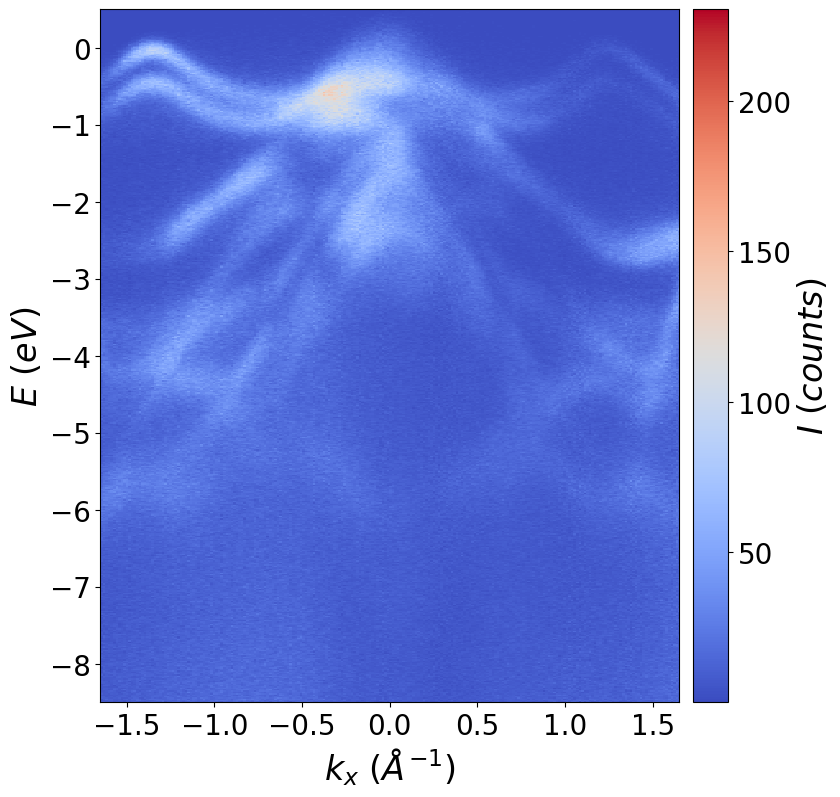

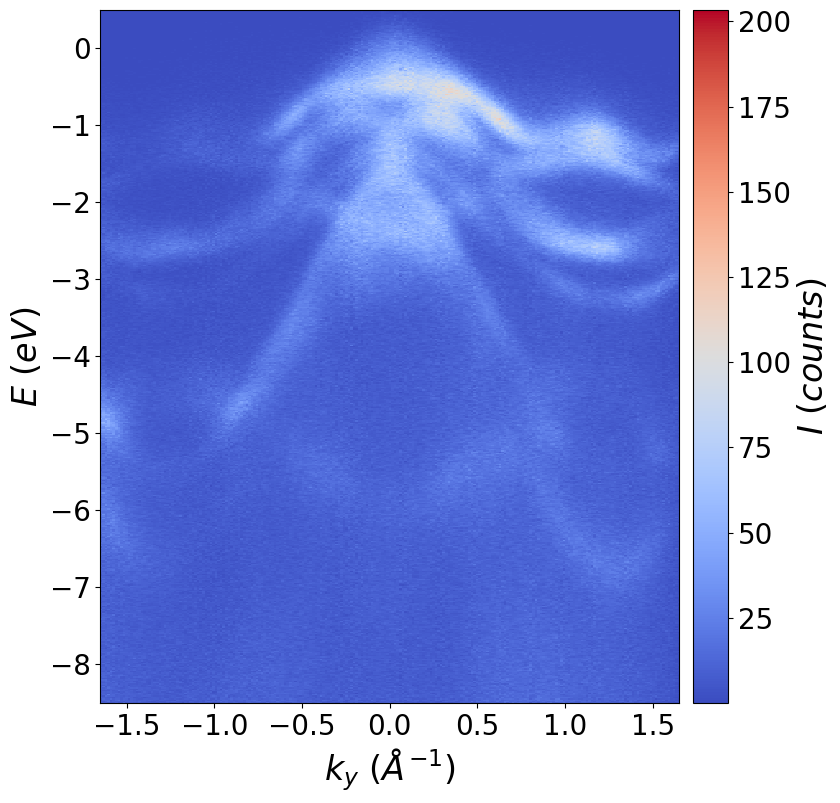

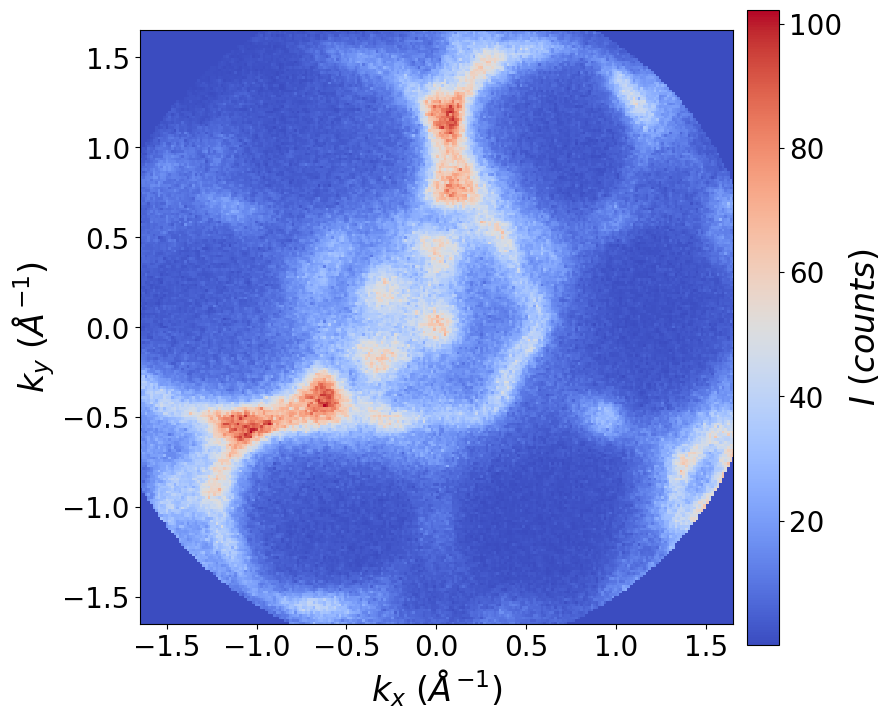

In [15]:
plot_slices(mrf, plot_dir, 'raw')

## Rotational symmetrization

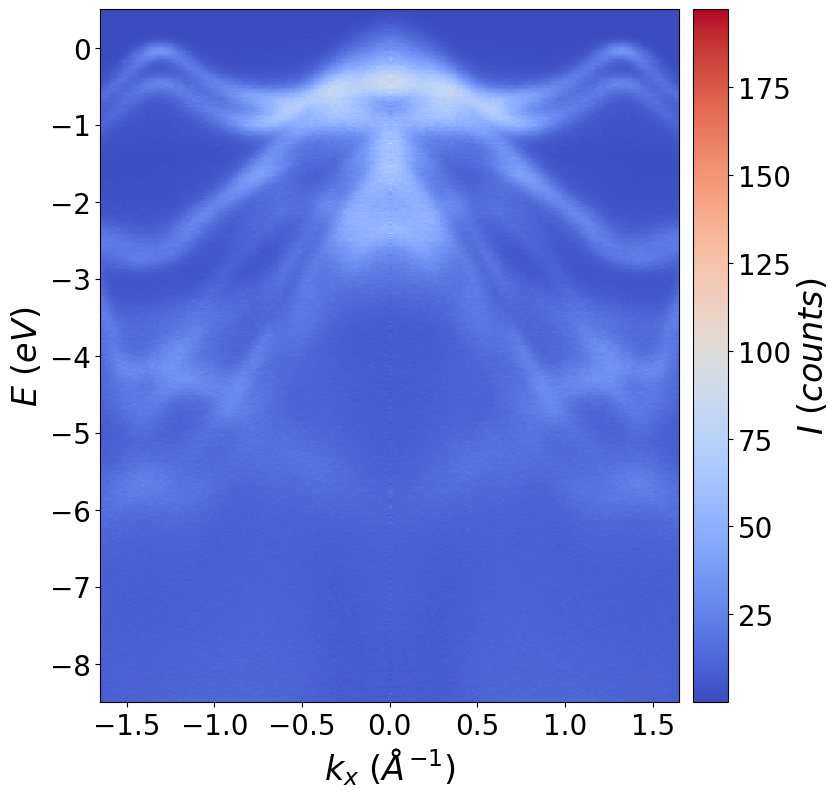

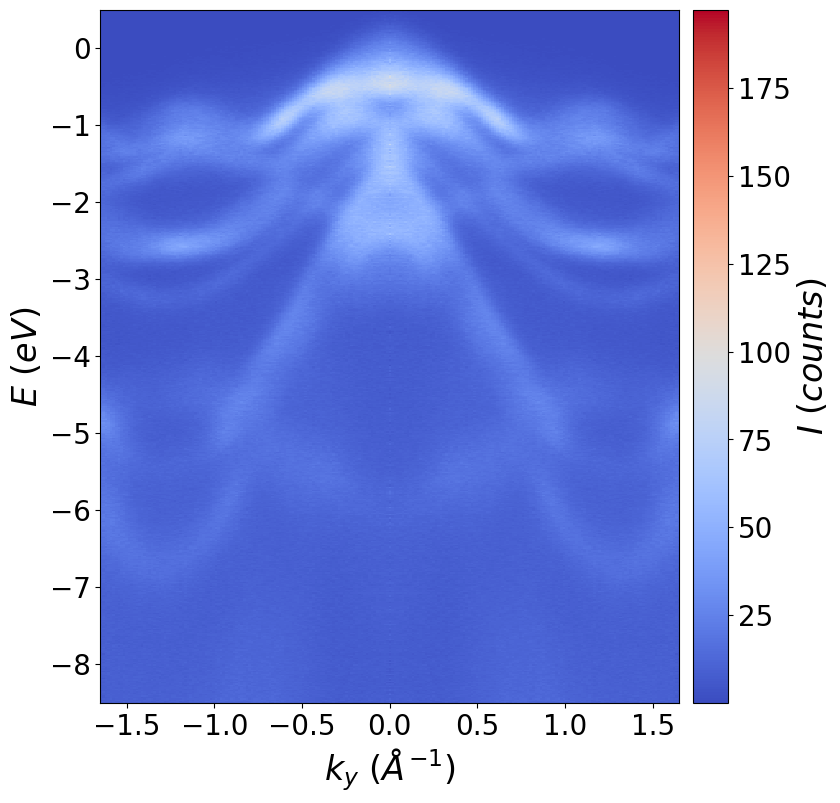

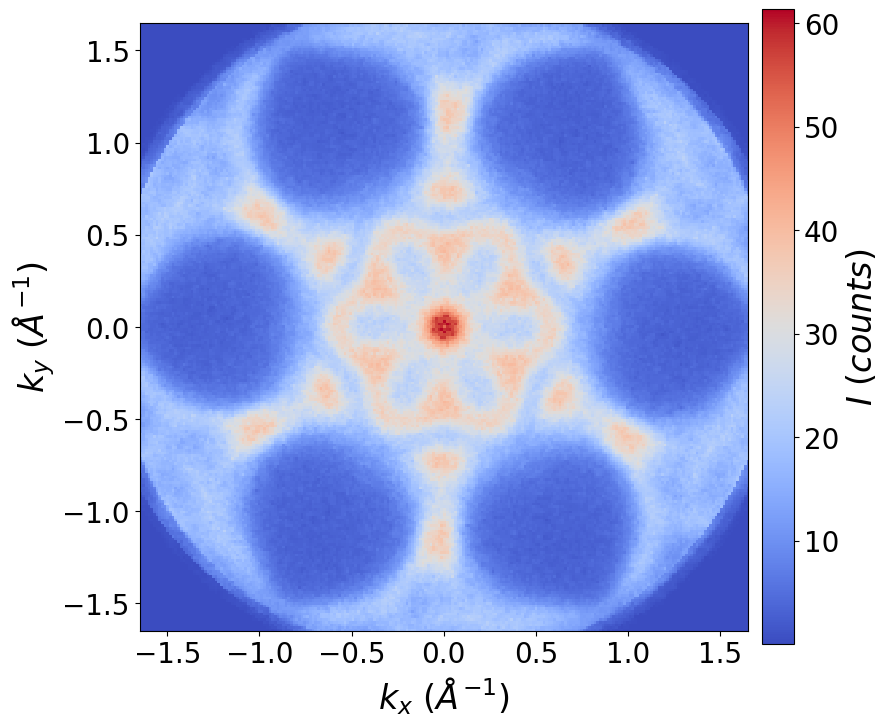

In [16]:
mrf.symmetrizeI(mirror=False)
plot_slices(mrf, plot_dir, 'sym_rot')

## Mirror symetrization

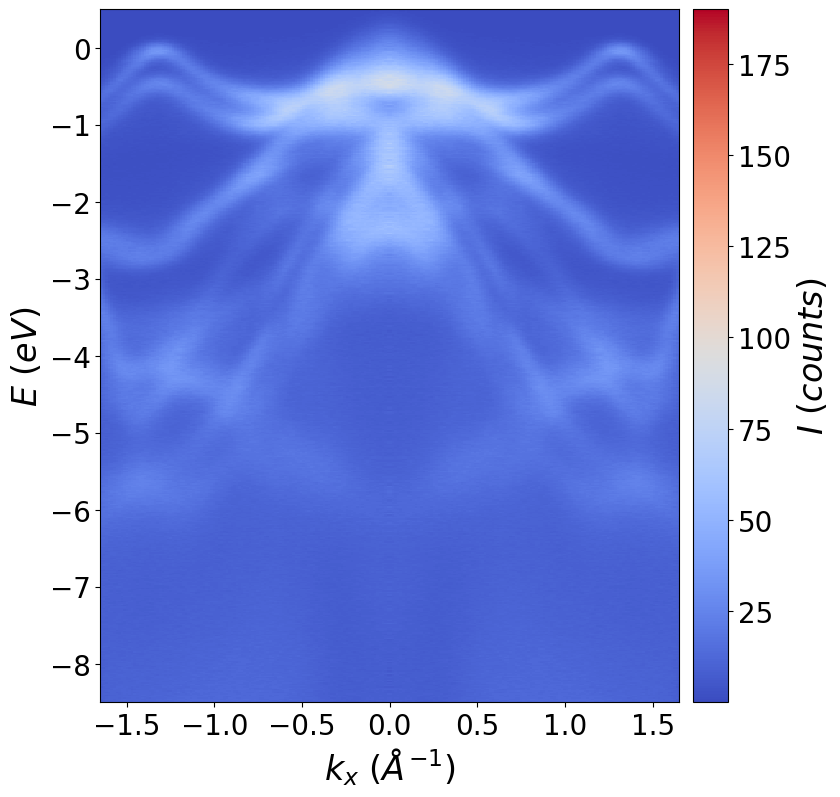

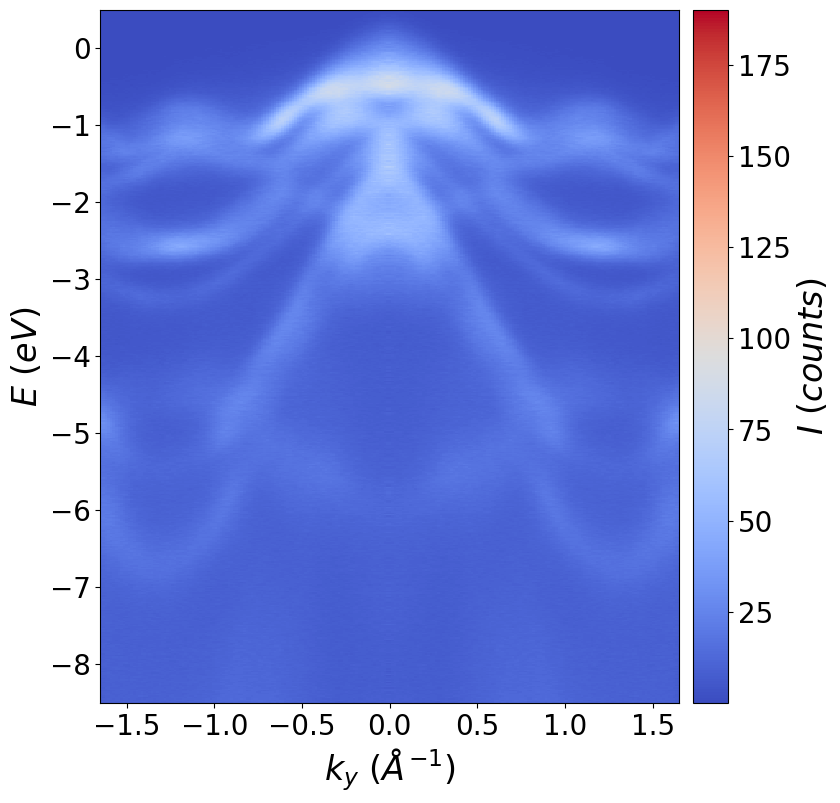

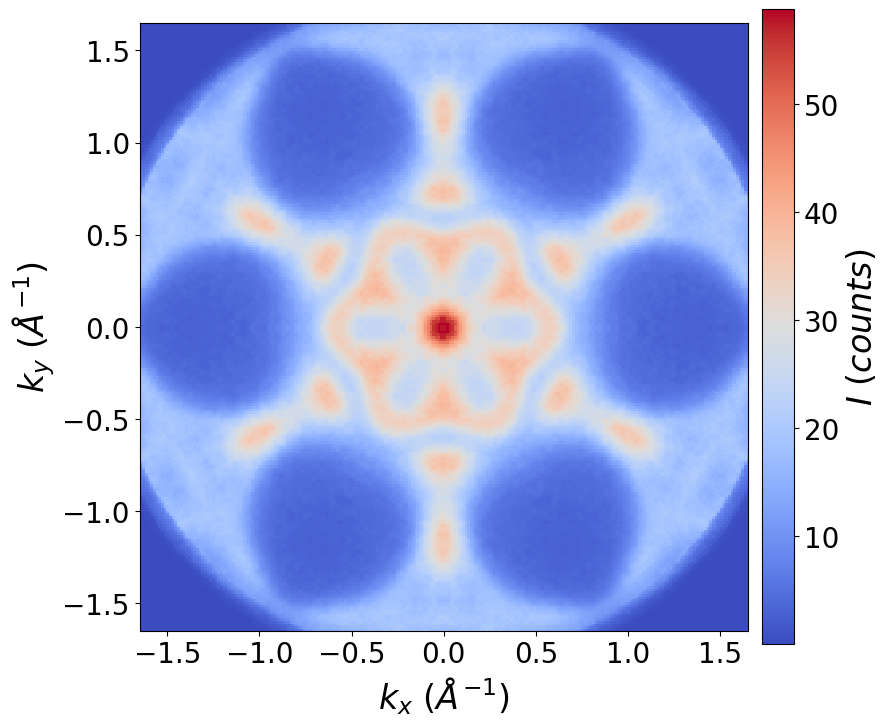

In [17]:
mrf.symmetrizeI(rotational=False)
plot_slices(mrf, plot_dir, 'sym_mir')

## Normalization using clahe

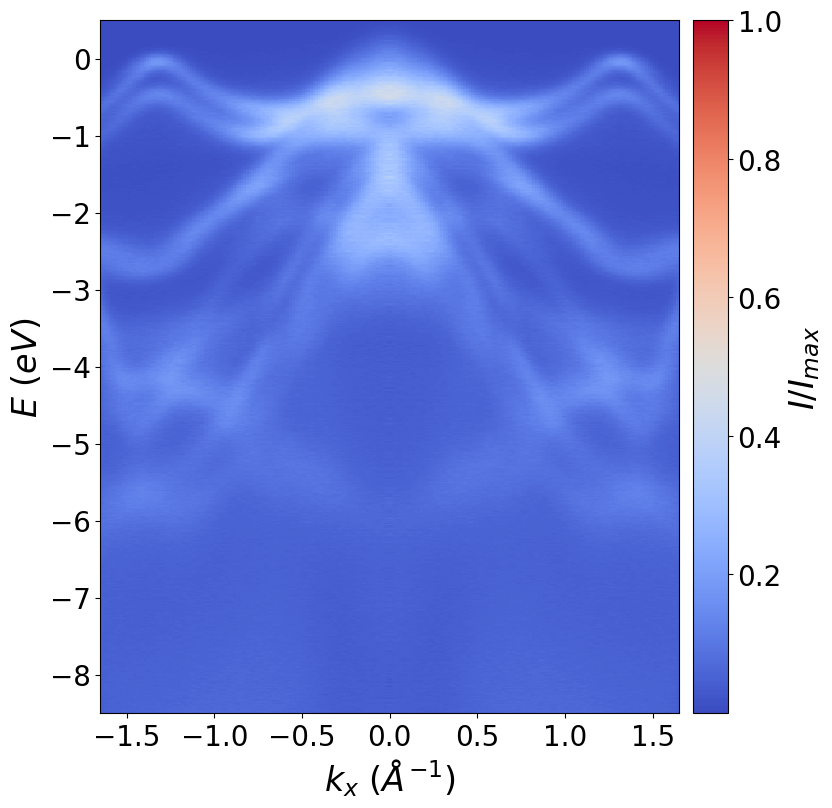

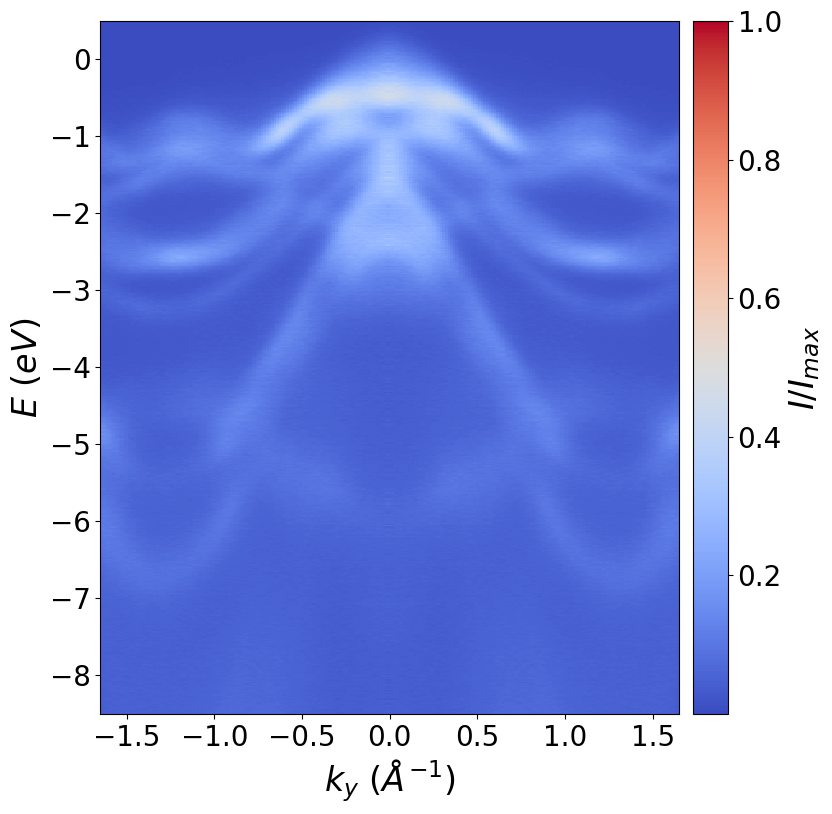

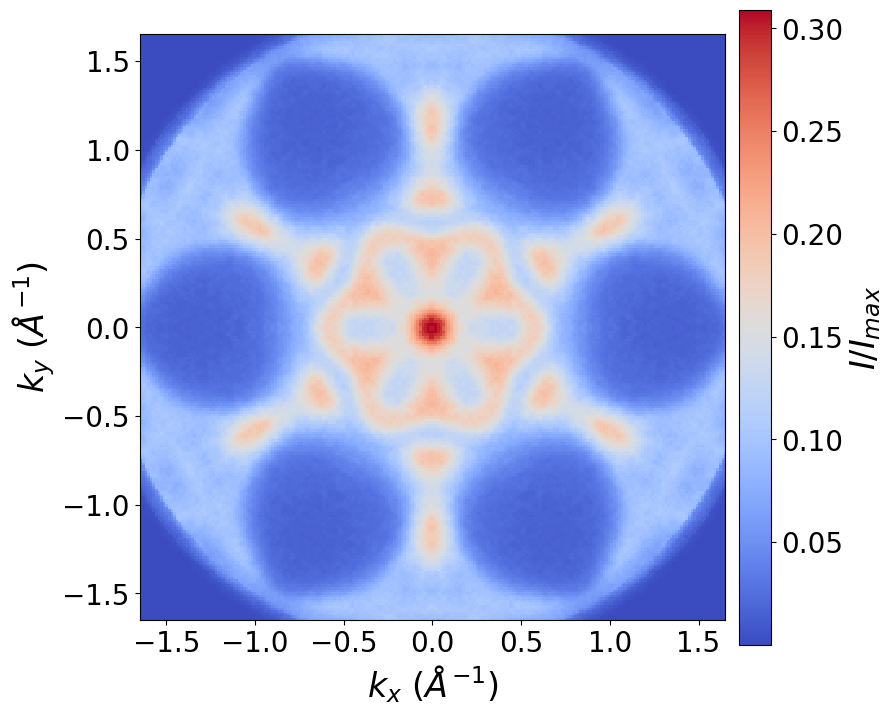

In [18]:
mrf.normalizeI(kernel_size=(30, 30, 40), n_bins=256, clip_limit=0.1, use_gpu=True)
plot_slices(mrf, plot_dir, 'clahe')

## Smoothing using Gaussian filter

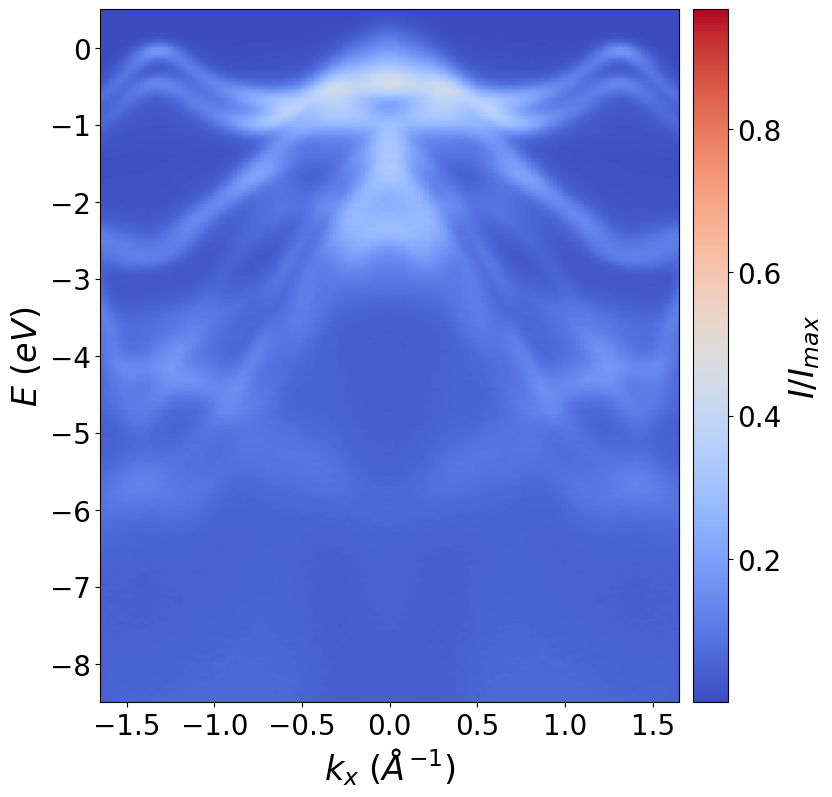

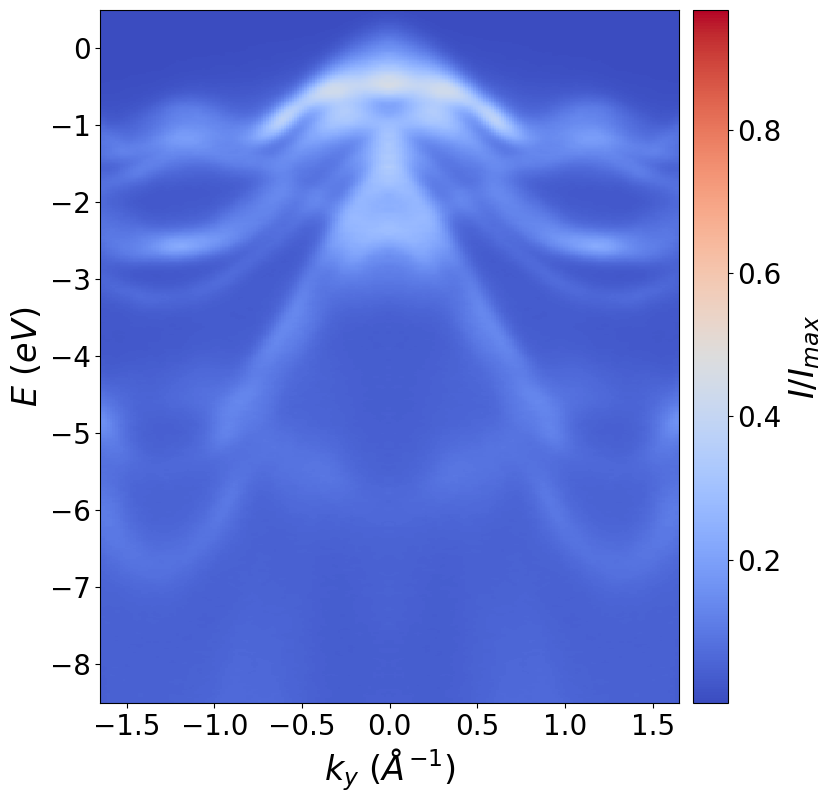

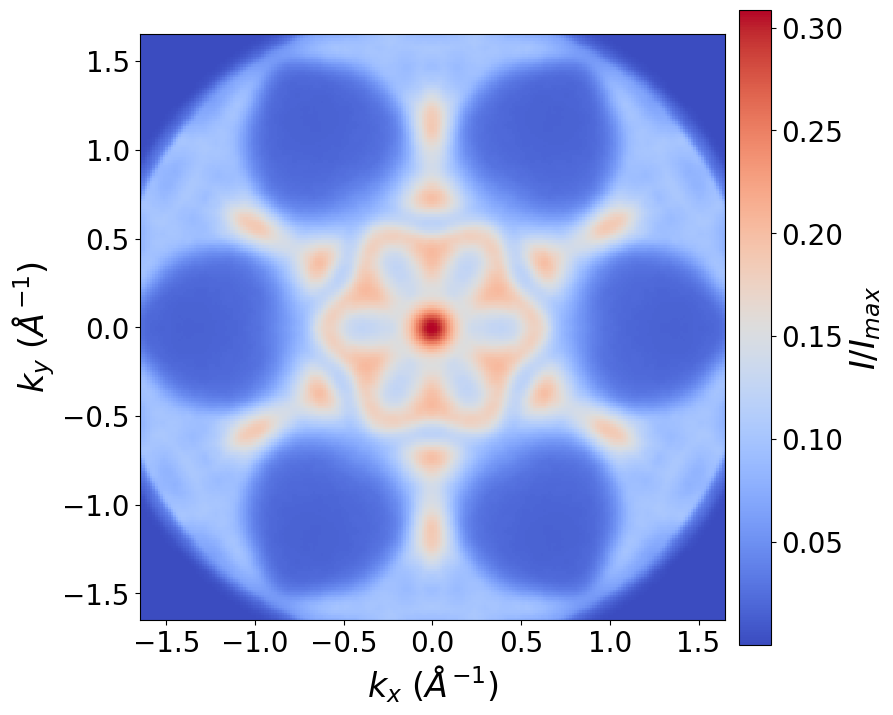

In [19]:
mrf.smoothenI(sigma=(.8, .8, 1.))
plot_slices(mrf, plot_dir, 'smooth')

## Save preprocessed dataset

In [21]:
data_save = [['axes', {'E': mrf.E, 'kx': mrf.kx, 'ky': mrf.ky}], ['binned', {'V': mrf.I}]]
saveHDF(*data_save, save_addr='./WSe2_preprocessed.h5')